In [17]:
from VGG_encoder import VGG_cls_pre
import torch
import cv2 as cv
from imgaug import augmenters as iaa
import numpy as np 

In [19]:
imagenet_stats = {'mean': [0.485, 0.456, 0.406],
                    'std': [0.229, 0.224, 0.225]}

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model = VGG_cls_pre("./utk_coral.pth").to(device)

Get Global_Regressor
=> loaded checkpoint './utk_coral.pth'


In [51]:
model.load_state_dict(torch.load('vgg_epoch_10.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [61]:
img = cv.imread("1_0_0_20161219140623097.jpg")
img = cv.resize(img, (224, 224))

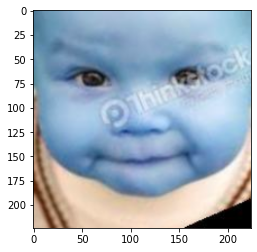

In [62]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [63]:
aug = iaa.Sequential([
            iaa.CropToFixedSize(width=224, height=224, position="center")
        ])

img = np.array(img)
img = aug(image=img)
img = img.astype(np.float32) / 255.
img = torch.from_numpy(np.transpose(img, (2, 0, 1)))

In [64]:
dtype = img.dtype
mean = torch.as_tensor(imagenet_stats['mean'], dtype=dtype)
std = torch.as_tensor(imagenet_stats['mean'], dtype=dtype)
img.sub_(mean[:, None, None]).div_(std[:, None, None])

tensor([[[-0.3693, -0.3531, -0.3451,  ...,  0.0269,  0.0188,  0.0188],
         [-0.3612, -0.3531, -0.3451,  ...,  0.0188,  0.0188,  0.0188],
         [-0.3774, -0.3693, -0.3531,  ...,  0.0107,  0.0107,  0.0107],
         ...,
         [ 0.7627,  0.7546,  0.7465,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.7546,  0.7546,  0.7303,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.7546,  0.7465,  0.7223,  ..., -1.0000, -1.0000, -1.0000]],

        [[ 0.0148,  0.0234,  0.0406,  ...,  0.4964,  0.4878,  0.4878],
         [ 0.0234,  0.0320,  0.0406,  ...,  0.4878,  0.4878,  0.4878],
         [ 0.0234,  0.0320,  0.0406,  ...,  0.4792,  0.4792,  0.4792],
         ...,
         [ 0.6426,  0.6340,  0.6340,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.6340,  0.6340,  0.6254,  ..., -1.0000, -1.0000, -1.0000],
         [ 0.6340,  0.6254,  0.6168,  ..., -1.0000, -1.0000, -1.0000]],

        [[ 0.4199,  0.4295,  0.4489,  ...,  0.8932,  0.8835,  0.8835],
         [ 0.4295,  0.4392,  0.4489,  ...,  0

In [48]:
img.unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [66]:
with torch.no_grad():
    prob = model(img.unsqueeze(0))

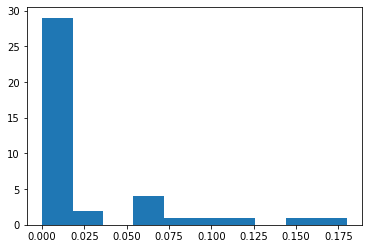

In [70]:
plt.hist(torch.nn.functional.softmax(prob, dim=1))
plt.show()